In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
edx_linedata_path = r"c:\Users\lb958\OneDrive - University of Cambridge\Data\Midi\EDX\23.07.17 MWCNTs DC 500mAg\reports\Line Data 1.csv"

df = pd.read_csv(edx_linedata_path)
df = df.drop(['Unnamed: 3'], axis=1)
print(df.head())

   Distance (µm)  C Kα1_2 (counts)  O Kα1 (counts)
0       0.000000                 0               0
1       0.419457                 0               0
2       0.838914                 0               0
3       1.258371                 2               1
4       1.677828                 1               0


<Axes: xlabel='Distance (µm)'>

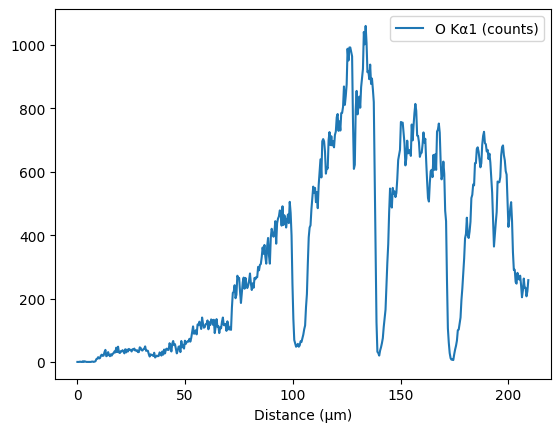

In [9]:
df.plot(x='Distance (µm)', y='O Kα1 (counts)')

In [10]:
from pybaselines import Baseline

def generate_baseline(x_data, y_data):
    baseline_fitter = Baseline(x_data = x_data)
    baseline = baseline_fitter.mor(y_data, half_window=30)[0]
    return baseline

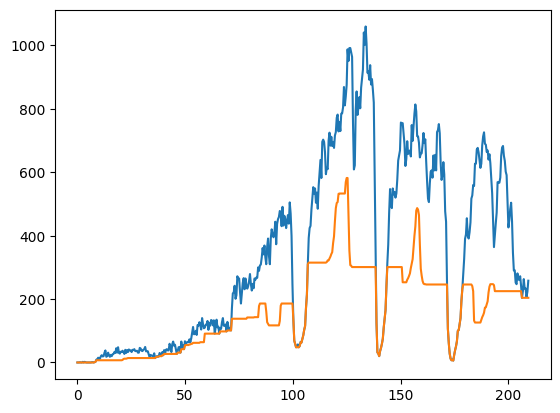

In [11]:
plt.plot(df['Distance (µm)'], df['O Kα1 (counts)'])
plt.plot(df['Distance (µm)'], generate_baseline(df['Distance (µm)'], df['O Kα1 (counts)']))
plt.show()

In [12]:
from scipy.signal import medfilt

def generate_baseline_medfilt(y_data):
    baseline = medfilt(y_data, 31)
    return baseline

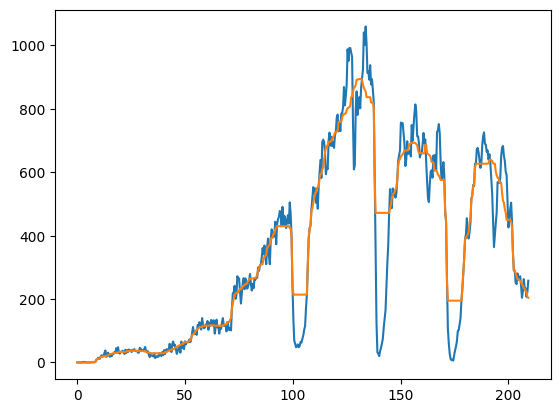

In [15]:
plt.plot(df['Distance (µm)'], df['O Kα1 (counts)'])
plt.plot(df['Distance (µm)'], generate_baseline_medfilt(df['O Kα1 (counts)']))
plt.show()

C:\Users\lb958\AppData\Local\Temp\ipykernel_32980\656752009.py:1: RuntimeWarning: divide by zero encountered in divide
  inverse_counts = 1/np.array(df['O Kα1 (counts)'])


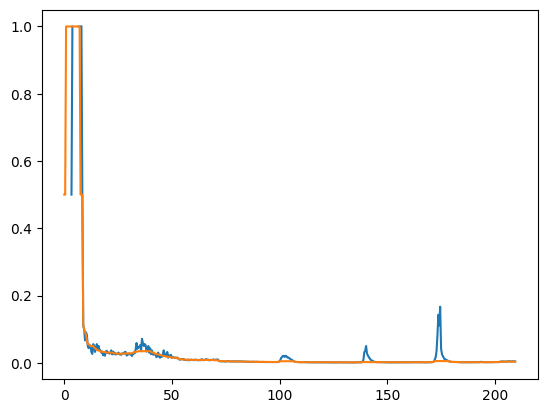

C:\Users\lb958\AppData\Local\Temp\ipykernel_32980\656752009.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(df['Distance (µm)'], 1/(inverse_counts-generate_baseline_medfilt(inverse_counts)))


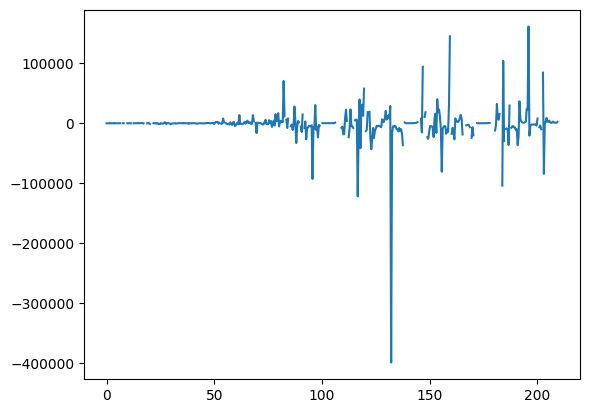

In [21]:
inverse_counts = 1/np.array(df['O Kα1 (counts)'])

plt.plot(df['Distance (µm)'], inverse_counts)
plt.plot(df['Distance (µm)'], generate_baseline_medfilt(inverse_counts))
plt.show()
plt.plot(df['Distance (µm)'], 1/(inverse_counts-generate_baseline_medfilt(inverse_counts)))